In [1]:
from util_plot import AbundPlot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import socket
from solar_rs import element2z_dict, z2element_dict, \
    logeps_sols, logeps_solr, logeps_sols_dict, logeps_solr_dict

from starfit import Single, Multi
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

exp10 = lambda x: np.power(10, x)
log10 = np.log10

datafile = 'LAMOST_r1+r2.csv'
datapath = Path(datafile)
if datapath.exists():
    logeps_path = datapath
else:
    hostname = socket.gethostname()
    relative_datadir = Path('Data/rproc')
    if hostname == 'jerome-linux':
        hostdir = Path('/home/jerome/Documents/GitHub')
        datadir = hostdir/relative_datadir
    elif hostname == 'sage2020':
        hostdir = Path('/home/jiangrz/hdd23')
        datadir = hostdir/relative_datadir
    logeps_path = datadir/datafile
df = pd.read_csv(logeps_path)
objnames = df.loc[:, 'objname'].values
objnames = [_.split('.')[0] for _ in objnames]

In [2]:
aplt = AbundPlot(datafile='logeps.csv')
kr_list = []
ks_list = []
dkr_list = []
dks_list = []
feh_list = []
Ba_s_list = []
Eu_r_list = []
name_list = []
for _, _star_data in aplt.df.iterrows():
    star_data = _star_data.values
    star_name = _star_data.objname
    if star_name not in objnames:
        continue
    try:
        fig = aplt.plot(star_name=star_name, fname=None, bbox_inches='tight')
        plt.close()
    except KeyError:
        continue
    feh_list.append(_star_data.FeH)
    _kr, _ks = aplt.kr, aplt.ks
    _dkr, _dks = aplt.dkr, aplt.dks
    Ba_s = _ks*np.power(10, logeps_sols_dict['Ba']-_star_data.Ba)
    Eu_r = _kr*np.power(10, logeps_solr_dict['Eu']-_star_data.Eu)
    kr_list.append(_kr)
    ks_list.append(_ks)
    dkr_list.append(_dkr)
    dks_list.append(_dks)
    Ba_s_list.append(Ba_s)
    Eu_r_list.append(Eu_r)
    name_list.append(star_name)
feh_arr = np.array(feh_list)
kr_arr = np.array(kr_list)
ks_arr = np.array(ks_list)
dkr_arr = np.array(dkr_list)
dks_arr = np.array(dks_list)
Ba_s_arr = np.array(Ba_s_list)
Eu_r_arr = np.array(Eu_r_list)
name_arr = np.array(name_list)

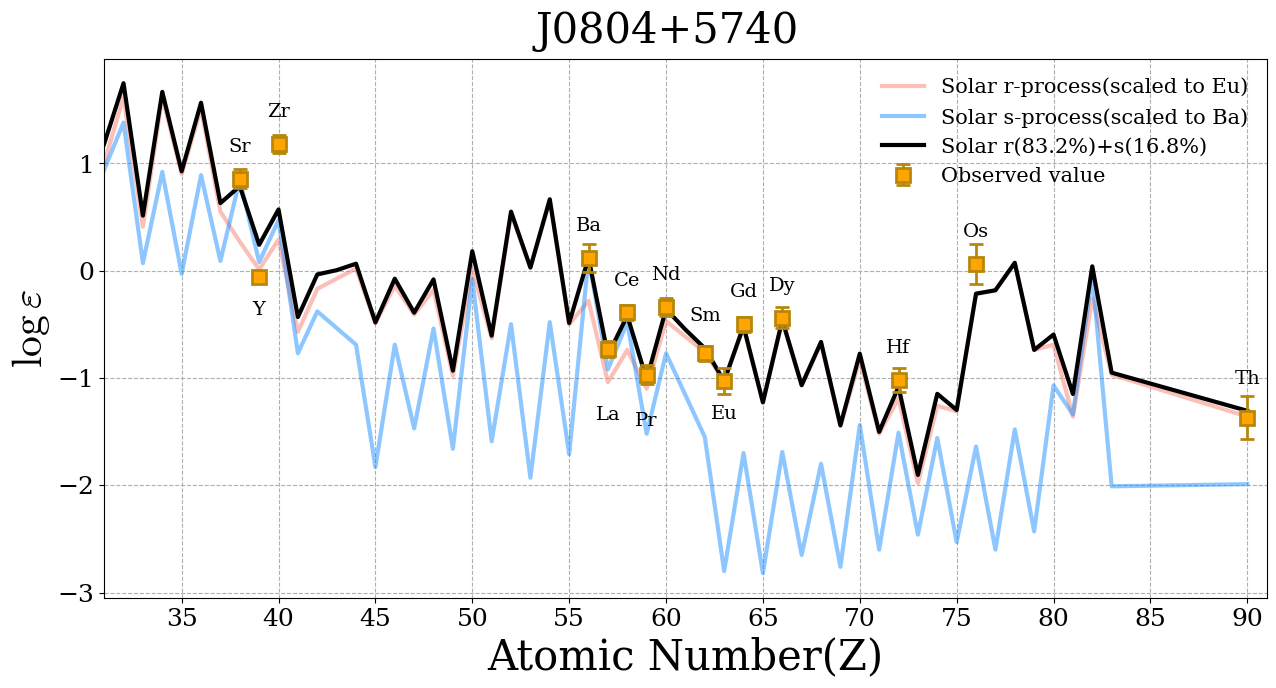

In [3]:
aplt.plot(star_name='J0804+5740', fname='J0804+5740_solar.pdf', dpi=300)

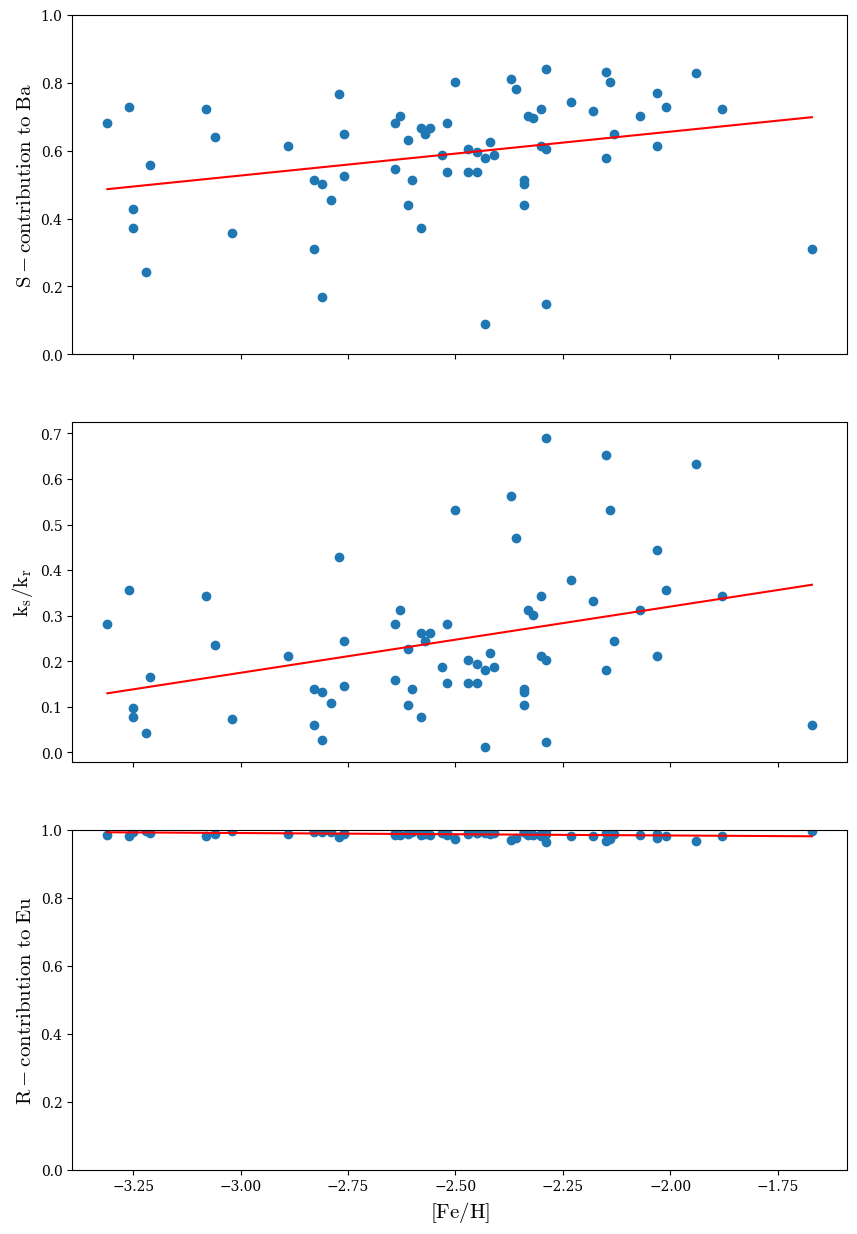

In [4]:
fig, ax = plt.subplots(
    3, 1, figsize=(10, 15), 
    sharex=True)
flag = kr_arr/ks_arr > 0
x = feh_arr[flag]
y = Ba_s_arr[flag]
ax[0].scatter(
    x, y, label=r'$k_r$')
k, b = np.polyfit(x, y, 1)
ax[0].plot([x.min(), x.max()], [x.min()*k+b, x.max()*k+b], c='r')
ax[0].set_ylim(0, 1)
ax[0].set_ylabel('$\mathrm{S-contribution\ to\ Ba}$', size=15)

y = (ks_arr/kr_arr)[flag]
ax[1].scatter(
    x, y, label=r'$k_r$')
k, b = np.polyfit(x, y, 1)
ax[1].plot([x.min(), x.max()], [x.min()*k+b, x.max()*k+b], c='r')
# ax[1].set_ylim(0, 1)
ax[1].set_ylabel('$\mathrm{k_s/k_r}$', size=15)

y = Eu_r_arr[flag]
ax[2].scatter(
    x, y, label=r'$k_r$')
k, b = np.polyfit(x, y, 1)
ax[2].plot([x.min(), x.max()], [x.min()*k+b, x.max()*k+b], c='r')
ax[2].set_xlabel('$\mathrm{[Fe/H]}$', size=15)
ax[2].set_ylim(0, 1)
ax[2].set_ylabel('$\mathrm{R-contribution\ to\ Eu}$', size=15)
plt.show()

In [5]:
ks_arr/kr_arr

array([ 0.37892901, -0.02234047,  0.02682812,  0.56356322,  0.10376516,
        0.04227235,  0.18733246,  0.63330365,  0.34400074,  0.16570276,
        0.69034826,  0.24423635,  0.09833872,  0.34400074,  0.20263368,
        0.13290453,  0.1093211 ,  0.02318781,  0.21056197,  0.34400074,
        0.15211544,  0.30119705,  0.28129208,  0.21056197,  0.17995058,
       -0.00601446,  0.05923472,  0.14555958,  0.28129208,  0.05923472,
        0.24423635,  0.13915717,  0.28129208,  0.15211544,  0.18733246,
        0.31151434,  0.13290453,  0.23551377,  0.21868155,  0.07786747,
        0.07786747,  0.26232031,  0.15211544,  0.22699718,  0.24423635,
        0.10376516,  0.31151434,  0.3329097 ,  0.31151434,  0.17995058,
        0.53119408,  0.65184697,  0.21056197,  0.35536298,  0.07304378,
        0.13915717,  0.20263368,  0.19489202,  0.42963428,  0.53119408,
        0.44310061,  0.15882854,  0.13915717,  0.26232031,  0.01276408,
        0.4710395 ,  0.35536298])

In [6]:
names = np.take_along_axis(name_arr, np.argsort(ks_arr/kr_arr), axis=-1)[ks_arr>0]

In [7]:
database = [
    'rproc.wu.star.el.y.stardb.xz', 
    'rproc.just15.star.el.y.stardb.xz', 
    'nuc.lc18.star.el.y.stardb.xz', 
    # 'znuc2012.S4.star.el.y.stardb.gz', 
]

for star_name in ['J0804+5740']:
    flag_idx = aplt.df.objname.values == star_name
    star_data = aplt.df.loc[flag_idx, :].values[0]
    star_logeps = star_data[3:34]
    flag_detect = ~pd.isna(star_logeps)
    star_logeps = star_data[3:34][flag_detect]
    star_elogeps = star_data[34:][flag_detect]
    star_el = aplt.df.columns.values[3:34][flag_detect]
    star_logeps = np.array(star_logeps, dtype=float)
    star_elogeps = np.array(star_elogeps, dtype=float)

    star_Z = np.array([element2z_dict[_] for _ in star_el])
    star_el_dict = {
        z2element_dict[_z]: 
        star_logeps[_idx] for _idx, _z in enumerate(star_Z)
    }
    np.power(10, star_logeps)
    # solar and star's s-proc elements 
    plot_Z = [element2z_dict[_] for _ in logeps_sols_dict.keys()]
    flag_heavy = star_Z > 30
    logeps_star_heavy = star_logeps[flag_heavy]
    elogeps_star_heavy = star_elogeps[flag_heavy]
    Z_star_detect = star_Z[flag_heavy]
    logeps_sols_detect = logeps_sols[np.in1d(plot_Z, Z_star_detect)]

    exp10_nons = exp10(logeps_star_heavy) - _ks*exp10(logeps_sols_detect)
    flag_abv0 = exp10_nons > 0
    exp10_nons[~flag_abv0] = exp10(logeps_star_heavy[~flag_abv0])
    logeps_nons = log10(exp10_nons)
    eexp10_nons = exp10(logeps_star_heavy+elogeps_star_heavy) - (_ks+_dks)*exp10(logeps_sols_detect)
    # define the invalid data to uppper limit
    eexp10_nons[~flag_abv0] = exp10(logeps_nons[~flag_abv0] - 1)
    elogeps_nons = np.log10(eexp10_nons) - logeps_nons
    elogeps_nons[~flag_abv0] = -1
    element_nons = np.array([z2element_dict[_] for _ in Z_star_detect])

    with open('test.dat', 'w') as file:
        file.write('10002\n')
        file.write('%s\n'%(star_data[0]))
        file.write('%s\n'%(''))
        file.write('%s\n'%(''))
        file.write('1\n')
        file.write('\n')
        file.write('%s\n'%(len(logeps_nons)))
        for _el, _logeps, _elogeps in zip(element_nons, logeps_nons, elogeps_nons):
            el_line = '%-3s  %5.2f  %5.2f'%(_el, _logeps, _elogeps)
            file.write('%s\n'%(el_line))
        file.write('As09')
    
    sing = Single(
        'test.dat', db=database, 
        z_min=31, z_max=85, 
        upper_lim=False, constraints='2:metallicity<.1', 
        silent=True
    ).plot(ylim=(-4, 0))
    # print(sing.sorted_fitness[0]/(sing.star.n_elements-2-1))

IndexError: boolean index did not match indexed array along dimension 0; dimension is 33 but corresponding boolean dimension is 31

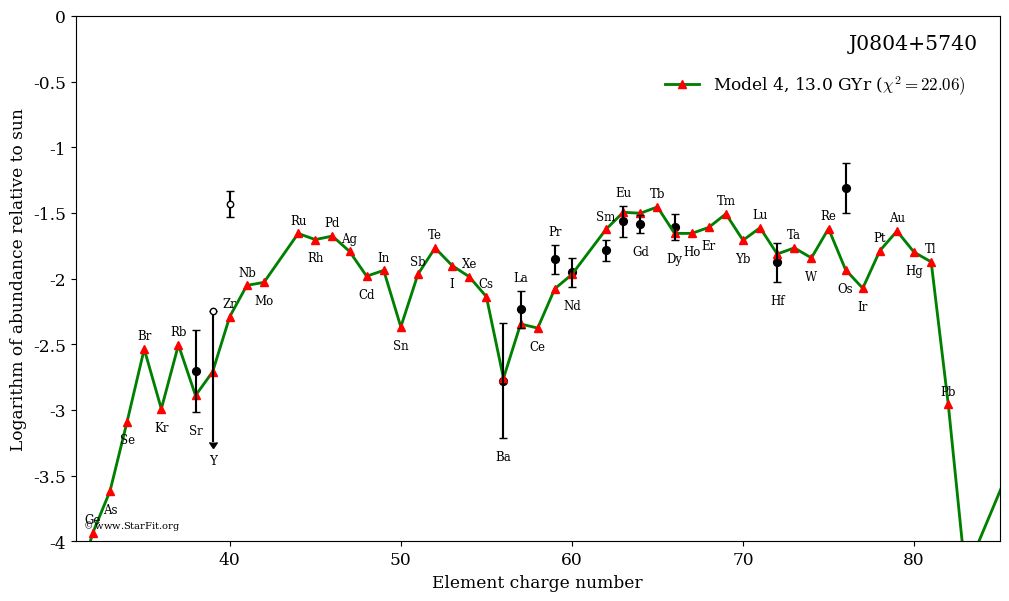

In [ ]:
sing = Single(
    'test.dat', db=database[1], 
    z_min=31, z_max=85, z_exclude=[39, 40], 
    upper_lim=True, 
    silent=True
).plot(ylim=(-4, 0), xlim=(31, 85))

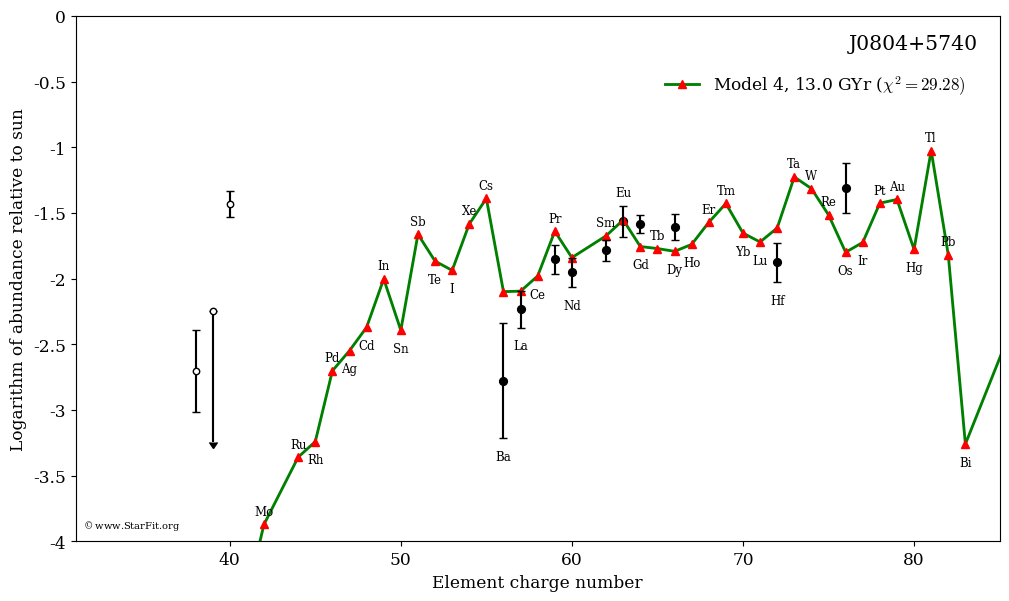

In [ ]:
sing = Single(
    'test.dat', db=database[0], 
    z_min=50, z_max=85, 
    upper_lim=True, 
    silent=True
).plot(ylim=(-4, 0), xlim=(31, 85))

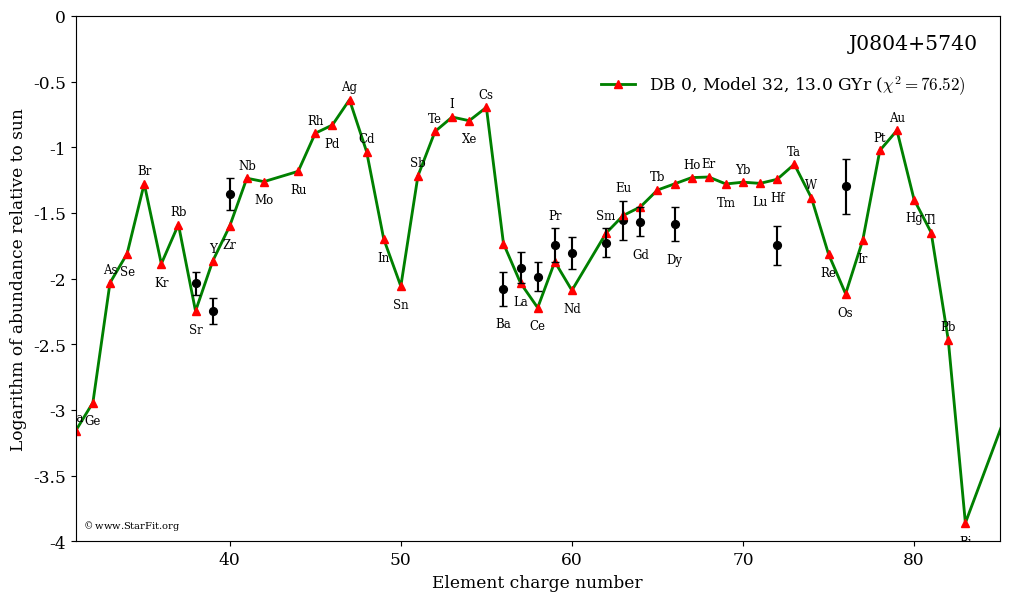

In [ ]:
sing = Single(
    '/home/jiangrz/hdd23/Data/rproc/star/J0804+5740.dat', db=database[:2], 
    z_min=31, z_max=85, 
    upper_lim=True, 
    silent=True
).plot(ylim=(-4, 0), xlim=(31, 85))

In [ ]:
10**.7

5.011872336272722